# EE16A Homework 12

## Question 1: Mechanical Correlation

### Part (e)

In [5]:
## your code here
import numpy as np

s1 = np.array([2, -2, 2, -2])
s2 = np.array([1, 2, 3, 4])

print('corr[s1, s2]:', np.correlate(s1, s2, "full"))
print('corr[s2, s1]:', np.correlate(s2, s1, "full"))

corr[s1, s2]: [ 8 -2  6 -4 -4 -2 -2]
corr[s2, s1]: [-2 -2 -4 -4  6 -2  8]


## Question 2: GPS Receivers

In [7]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


In [8]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    shamt = delay[satellite_ID - 1]
    G2_out = np.roll(MLS2,shamt)
    
    CA_code = G1_out * G2_out
    
    return CA_code

### Part (a)

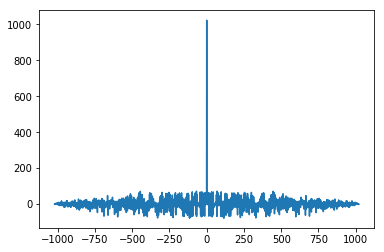

In [17]:
def array_correlation(array1, array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value
    """
    ## YOUR CODE HERE
    correlation = np.correlate(array1, array2, 'full')
    length = max(len(array1), len(array2))
    offset = np.array(range(-length+1, length))
    return offset, correlation
    ## Use np.correlate with "FULL". Check out the documentation page.
    
# Plot the auto-correlation of satellite 10 with itself. Your signal should be centered
# at offset = 0.
# Use plt.plot or plt.stem to plot.

# YOUR CODE HERE
sate = Gold_code_satellite(10)
a, b = array_correlation(sate, sate)
plt.plot(a, b)

### Part (b)

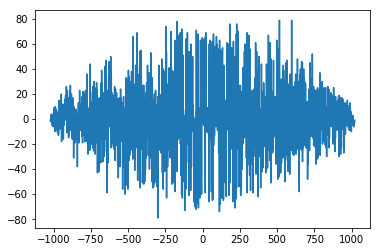

In [18]:
# YOUR CODE HERE
sate10 = Gold_code_satellite(10)
sate13 = Gold_code_satellite(13)

a, b = array_correlation(sate10, sate13)
plt.plot(a, b)

### Part (c)

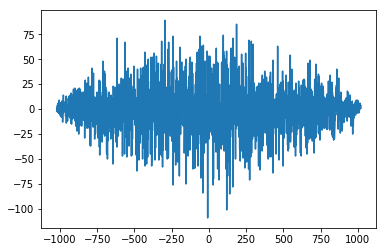

In [20]:
## THIS IS A HELPER FUNCTION FOR PART C
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2, size = length_of_noise)
    noise_array = 2 * noise_array - np.ones(size(noise_array))
    return noise_array

# YOUR CODE HERE
sate10 = Gold_code_satellite(10)
random = integernoise_generator(len(sate10))

a, b = array_correlation(sate10, random)
plt.plot(a, b)

### Part (d)

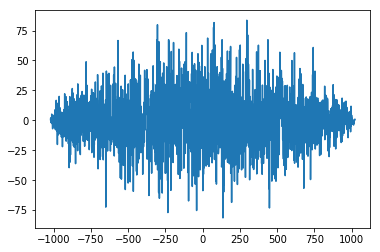

In [23]:
## THIS IS A HELPER FUNCTION FOR PART D
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0, 1, length_of_noise)
    return noise_array

# YOUR CODE HERE
noise = gaussiannoise_generator(1023)
sate10 = Gold_code_satellite(10)

a, b = array_correlation(sate10, noise)
plt.plot(a, b)

### Part (e)
Hint: you can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. np.argwhere may be useful for detecting peak locations.

In [126]:
## USE 'np.load' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY
data = np.load('data1.npy')

present = []

for index in range(1, 25):
    sate = Gold_code_satellite(index)
    _, b = array_correlation(sate, data)
    if np.any(abs(b) >= 800):
        present.append(index)
        
if len(present) > 0:
    print(present)

# YOUR CODE HERE

[4, 7, 13, 19]


### Part (f)

In [131]:
## USE DATA2.NPY AS THE SIGNAL ARRAY
data = np.load('data2.npy')

present = 0
for index in range(1, 25):
    sate = Gold_code_satellite(index)
    a, b = array_correlation(sate, data)
    if np.any(abs(b) >= 800):
        present = index
        print('Satellite', present)

bits = []
for i in range(0, 5):
    sate = Gold_code_satellite(present)
    cur_data = data[i*1023:(i+1)*1023]
    
    _, b = array_correlation(cur_data, sate)

    if np.any(b >= 800):
        bits.append(1)
    elif np.any(b <= -800):
        bits.append(-1)

print('Message:', bits)
    
# YOUR CODE HERE

Satellite 3
Message: [1, -1, -1, -1, 1]


### Part (g)

In [136]:
## USE DATA3.NPY AS THE SIGNAL ARRAY
data = np.load('data3.npy')

present = []

for index in range(1, 25):
    sate = Gold_code_satellite(index)
    a, b = array_correlation(sate, data)
    if np.any(abs(b) >= 800):
        present.append(index)
        
if len(present) > 0:
    print('Satellites:', present)
    
offset = []
for sate_num in present:
    sate = Gold_code_satellite(sate_num)
    
    actual_data = np.append(sate, sate)
    actual_data = np.append(actual_data, -actual_data)
    actual_data = np.append(actual_data, -sate)
        
    a, b = array_correlation(actual_data, data)
    offset.append(np.argwhere(abs(b) >= 800)[0][0])

print('Offsets are:', offset)
delay = abs(offset[0] - offset[1])
print('Relative Delay is:', delay)

# YOUR CODE HERE

Satellites: [5, 20]
Offsets are: [1528, 1022]
Relative Delay is: 506


## Question 3: Retail Store Marketing

### Part (d)

In [145]:
spending = np.array([
    [0.40, 0.33, 0.22, 0.05],
    [0.70, 0.10, 0.10, 0.10],
    [0.20, 0.10, 0.15, 0.55],
    [0.05, 0.02, 0.20, 0.73]
])

T = np.array([0.375, 0.25, 0.0625, 0.3125])

x = np.linalg.solve(spending, T)
print(x)

[ 0.07819672 -2.14557377  4.98147541 -0.88327869]


In [166]:
sA = np.array([
    [1/2, 1/2, -1/2, 1/2],
    [2/3, -1/2, 1/2, 1/3],
    [-1/2, -1/2, 5/2, -1/2],
    [0, 1/2, 0, 1/2]
])

similarity = []
for promo in sA:
    similarity.append(np.correlate(promo/np.linalg.norm(promo), x))

max_sim = np.max(similarity)
index = np.argwhere(similarity == max_sim)[0][0]
print('Use promo sA', index+1, ':', sA[index])

Use promo sA 3 : [-0.5 -0.5  2.5 -0.5]


### Part (e)

In [173]:
rank = np.linalg.matrix_rank(spending)

if rank < spending[0].size:
    print('Linearly dependent')
else:
    print('Full rank! (Linearly independent)')

Full rank! (Linearly independent)
